In [1]:
import os
import pandas
from collections import Counter
import numpy as np

In [2]:
"""
file_names = [r"/Users/arvin/Documents/ucla research/active learning/compare_train_files/DMPLS_exp0_coreset_metric_cosine_v7/train_al0.05_seed0.txt", 
              r"/Users/arvin/Documents/ucla research/active learning/compare_train_files/DMPLS_exp0_coreset_slice_pos50_patient50_mult5_v7/train_al0.05_seed0.txt",
              r"/Users/arvin/Documents/ucla research/active learning/compare_train_files/DMPLS__coreset_v7/train_al0.05_seed0.txt"]
file_names = [r"/Users/arvin/Documents/ucla research/active learning/compare_train_files/DMPLS_exp0_coreset_metric_cosine_v7/train_al0.1_seed0.txt", 
              r"/Users/arvin/Documents/ucla research/active learning/compare_train_files/DMPLS_exp0_coreset_slice_pos50_patient50_mult5_v7/train_al0.1_seed0.txt",
              r"/Users/arvin/Documents/ucla research/active learning/compare_train_files/DMPLS__coreset_v7/train_al0.1_seed0.txt"]
file_names = [r"/Users/arvin/Documents/ucla research/active learning/compare_train_files/DMPLS_exp0_coreset_slice_pos50_patient50_mult5_v7/train_al0.15000000000000002_seed0.txt",
              r"/Users/arvin/Documents/ucla research/active learning/compare_train_files/DMPLS__coreset_v7/train_al0.15000000000000002_seed0.txt"]
"""
file_names = [r"/Users/arvin/Documents/ucla research/active learning/compare_train_files/DMPLS_exp0_coreset_slice_pos50_patient50_mult5_v7/train_al0.2_seed0.txt",
              r"/Users/arvin/Documents/ucla research/active learning/compare_train_files/DMPLS__coreset_v7/train_al0.2_seed0.txt",
             r"/Users/arvin/Documents/ucla research/active learning/compare_train_files/train_al1.0_seed0.txt"]

In [3]:
slice_dict = dict()
for file_name in file_names:
    with open(file_name, 'r') as file:
        lines = [line.strip() for line in file]
    slice_dict[file_name] = lines

/Users/arvin/Documents/ucla research/active learning/compare_train_files/DMPLS_exp0_coreset_slice_pos50_patient50_mult5_v7/train_al0.2_seed0.txt
Patients, mean: 3.7662337662337664, std: 1.3279816136274514
Phases, mean: 145.0, std: 11.0
Slice Nos, mean: 29.0, std: 8.342661445845684
/Users/arvin/Documents/ucla research/active learning/compare_train_files/DMPLS__coreset_v7/train_al0.2_seed0.txt
Patients, mean: 3.7662337662337664, std: 1.3377253799291522
Phases, mean: 145.0, std: 17.0
Slice Nos, mean: 29.0, std: 8.67179335547152
/Users/arvin/Documents/ucla research/active learning/compare_train_files/train_al1.0_seed0.txt
Patients, mean: 18.175, std: 2.849451701643669
Phases, mean: 727.0, std: 0.0
Slice Nos, mean: 145.4, std: 31.45854414940399


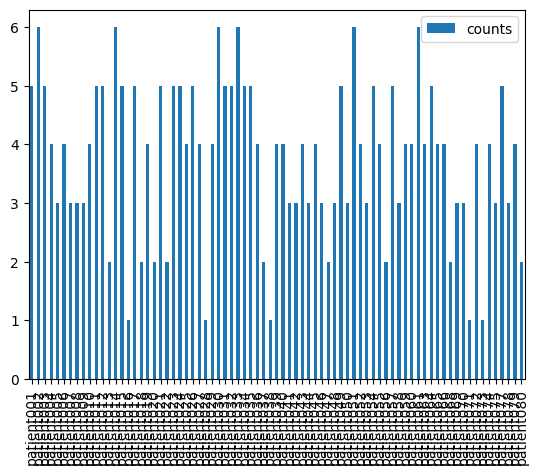

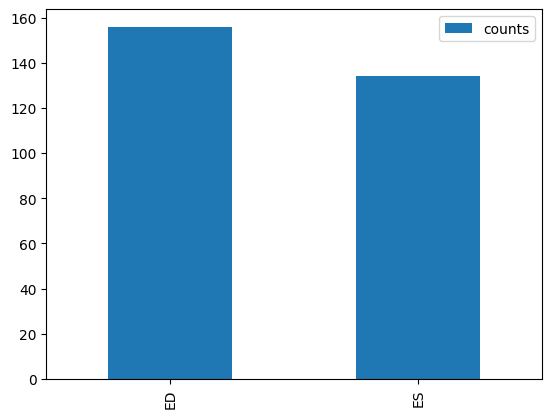

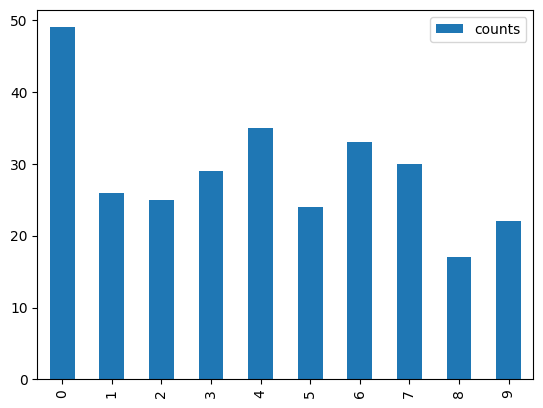

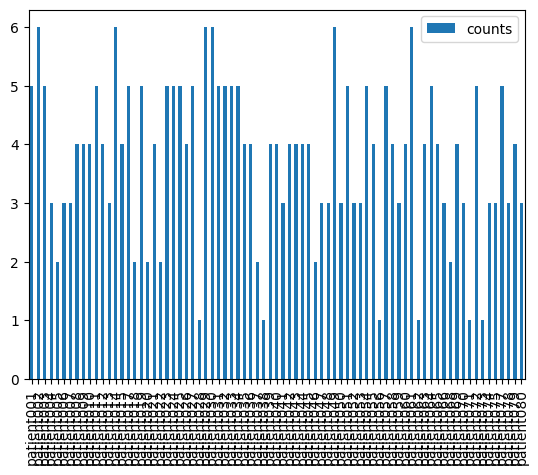

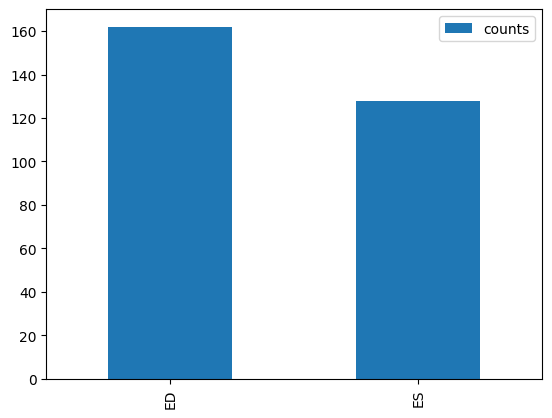

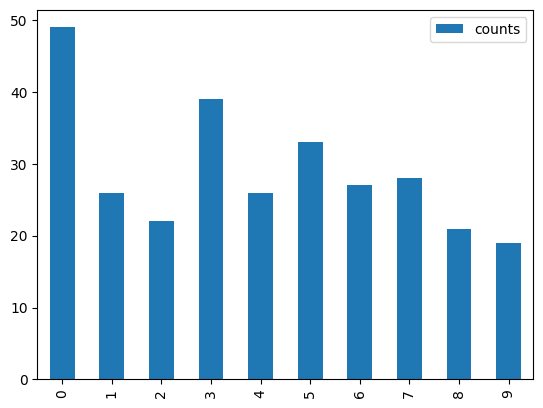

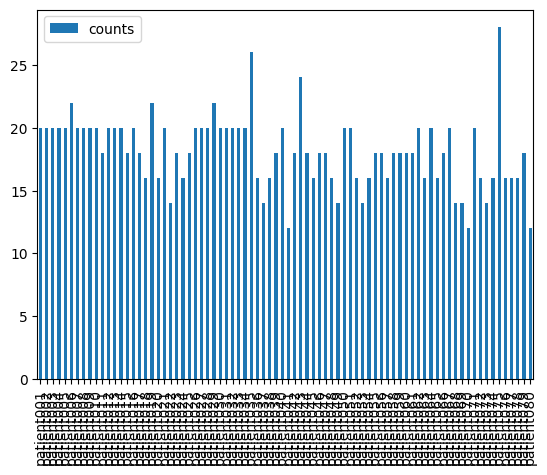

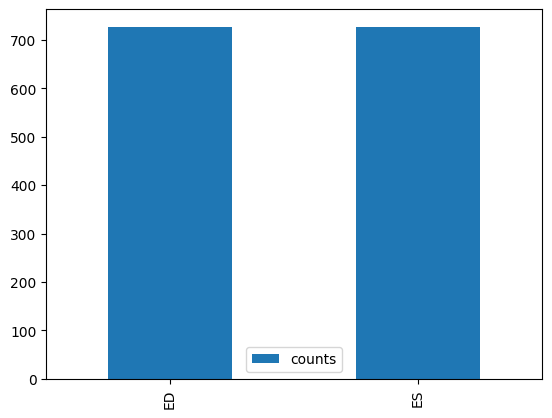

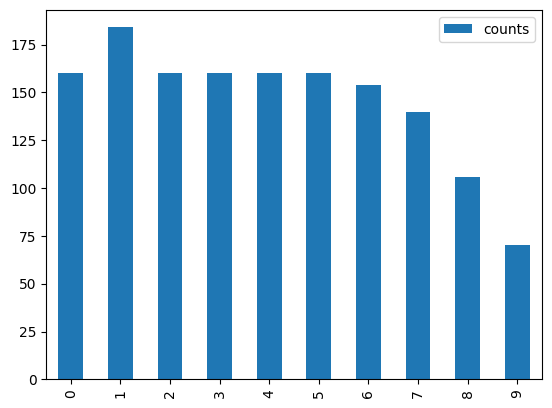

In [4]:
for file_name in file_names:
    print(file_name)
    patient_name_len = len("patient070")
    frame_no_start_len = len("patient070_")
    frame_no_end_len = len("patient070_frame01")
    slice_no_start_len = len("patient070_frame01_slice_")
    slice_no_end_len = len("patient070_frame01_slice_0")
    slice_list = slice_dict[file_name]
    
    patient_list = []
    phase_list = []
    slice_no_list = []
    for slice_ in slice_list:
        slice_ = os.path.basename(slice_)
        patient_name = slice_[:patient_name_len]
        patient_list.append(patient_name)
        frame_no = slice_[frame_no_start_len:frame_no_end_len]
        if frame_no == "frame01":
            phase_list.append("ED")
        else:
            phase_list.append("ES")
        slice_no = slice_[slice_no_start_len:slice_no_end_len]
        slice_no_list.append(slice_no)
    patient_counts = Counter(patient_list)
    phase_counts = Counter(phase_list)
    slice_no_counts = Counter(slice_no_list)
    df1 = pandas.DataFrame(patient_counts.values(), index=patient_counts.keys(), 
                           columns=["counts"])
    df1 = df1.sort_index()
    df2 = pandas.DataFrame(phase_counts.values(), index=phase_counts.keys(), 
                           columns=["counts"])
    df2 = df2.sort_index()
    df3 = pandas.DataFrame(slice_no_counts.values(), index=slice_no_counts.keys(), 
                           columns=["counts"])
    df3 = df3.sort_index()
    print(f"Patients, mean: {np.mean(list(patient_counts.values()))}, std: {np.std(list(patient_counts.values()))}")
    print(f"Phases, mean: {np.mean(list(phase_counts.values()))}, std: {np.std(list(phase_counts.values()))}")
    print(f"Slice Nos, mean: {np.mean(list(slice_no_counts.values()))}, std: {np.std(list(slice_no_counts.values()))}")

    df1.plot(kind='bar')
    df2.plot(kind='bar')
    df3.plot(kind='bar')